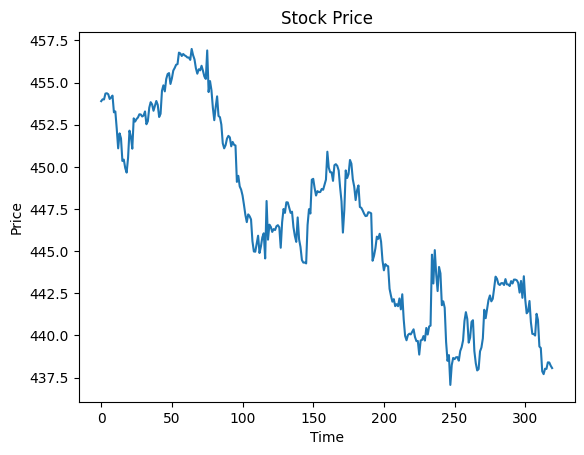

In [6]:
import matplotlib.pyplot as plt

# Read the stock price data from the file
data = []
with open('SPY_30min_sample.txt', 'r') as file:
    for line in file:
        timestamp, a, b, c, price, d = line.strip().split(',')
        data.append((timestamp, float(price)))

# Extract the prices from the data
prices = [price for _, price in data]

# Find the secondary high points
secondary_high_points = []
secondary_high_start = prices[0]

secondary_low_points = []
secondary_low_start = prices[0]

past_high = prices[0]
past_low = prices[0]

is_increasing = (prices[1] > prices[0])

for i in range(1, len(prices) - 1):
    if prices[i] > past_high:
        past_high = prices[i]
        if prices[i] > prices[i-1] and prices[i] < past_high:
            secondary_high_start = prices[i]
            secondary_high_points.append((i, secondary_high_start))
            is_increasing = False

    secondary_high_points.append(0)
# Plot the price chart
plt.plot(prices)

# Mark the secondary high points as red dots
for i in secondary_high_points:
    plt.scatter(i, prices[i], color='red')

# Show the plot
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price')
plt.show()
